#                                  AUTOMATED CLASSIFICATION OF MOVIES FROM THEIR SCRIPTS
  #  Data Source and Cleaning

The notebook contains the codes used in data scrapping  and cleaning. 

The resulting dataframe from the cleaning is then saved and imported in the second notebook attached for analysis and experiments

In [1]:
#Import all libraries needed
import os
import warnings
import requests
import seaborn
import nltk
import re
import json
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nlpaug.augmenter.word.context_word_embs as aug
from wordcloud import WordCloud
from nltk.corpus import stopwords 
from bs4 import BeautifulSoup
from os import listdir
from collections import Counter
warnings.filterwarnings ('ignore' )

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\__init__.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\__init__.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-pack

In [2]:
#Function to open and read a movie script file
def read_file (file_path):
    '''This function takes a file path and reads the document in it'''
    
    file = open(file_path, 'r', encoding='utf-8', errors= 'ignore' )
    text = file.readlines()
    file.close()
    return text

Next is to identify the character names in the script. This will be used later on during the preprocessing

After observing script writing patterns, the character names tend to occur close to the centre of the page and are always in upper case

In [3]:
#Function to get character names from the movie script
def character_names (script):
    '''for the script loaded, this function checks for the character names in it
        and appends it to a list'''
    names = []
    for lines in script:
    #finds whitespace before the first word 
        whitespace = len (lines) - len (lines.lstrip())
    
    #To select upper case text characters after and before the the 30th and 40th white spaces respectively 
        if (whitespace >= 30) & ( whitespace <= 40) and lines.isupper():
            
        
    #Removes any speacial characters that comes with the name and converts it to lower case
            out = re.sub(r'[^a-zA-Z0-9]', '' , lines)
            out = out.lower()

    #check if name already exists in the list
            if out in names:
                next
            else:
                names.append(out)

    return names
            
        
        

In [4]:
#Function to clean scripts
def clean_script (script):
    '''for the script loaded, this returns a cleaned output of the script'''
    #Convert script to list of strings
    string_script = ' '.join(script)
    
    #replace non-alpha-numeric characters with white space
    output = re.sub(r'[^a-zA-Z0-9]', ' ', string_script)
    #remove html tags
    output = re.sub('<.*?>', ' ', output) 

    #Split the text to take care of the white spaces after joining later
    script_split = output.split()
    
    #change all the words in the script to lower case   
    lower_script = [words.lower() for words in script_split]
    
    #remove non alphabetic characters
    alpha_script  = [words for words in lower_script if words.isalpha()]
    
    #remove stop words from the scripts
    stop_words =  (stopwords.words('english'))
    #some other common words appear in the scripts with no regular pattern    
    stop_words.extend (['window', 'top', 'href', 'location', 'ext'])
    
    final_script = [words for words in alpha_script if not words in stop_words ]
     
    return final_script

Part of the cleaning is also lemmatization. But this will be done after the character names have been removed. This is to ensure some names are not converted to their root words, which might cause them not to be removed.

Movie titles also needs to be extracted, this will be used later on to search for other information about the movie.

Each script is stored by its corresponding movie title.

However, some of the files contain extenstions that points to where the movie scripts were downloaded from. This always comes after the main title, in form of '-script-at'

In [5]:
#Function to extract movie title
def movie_name (movie):
    
    movie.split('-')
    #Check if file name contains 'script'. which is an extention of the file name
    if 'script' not in movie:
        
    #Truncate the .txt extention in the file name and remove '-'
        title = movie[:1-5].replace('-', ' ')          
        
    else:
        name = movie.split('-')
    #Delete all characters from 'script' to the end of the file name, leaving only the movie name
        del name[name.index('script'):]
        title = ' '.join(name)
        
    return title    

The files the movie script directory will now be processed

Some of the files in the directory are not useful. Files less than 100bytes will be removed

In [6]:
#Function to process all movie script files
def read_files (files_dir):
    movie_title = []
    char_name = []
    clean_file = []
    #checks and removes files with less than 100 bytes of data    
    for filename in listdir (files_dir):
        if  os.path.getsize(files_dir + str(filename)) < 100:
            os.remove(files_dir + str(filename))
    #Load .txt files            
        if  filename.endswith ('.txt'):
            file_path = files_dir + filename
            
            file_content = read_file (file_path)
            char_name.append (character_names (file_content))
            clean_file.append (clean_script (file_content))
            movie_title.append (movie_name (filename))
            
            
    return movie_title, clean_file, char_name

In [7]:
movie_title, script, characters = read_files ('scripts/')

In [8]:
print (len(movie_title))
print (len (script))
print (len(characters))

809
809
809


In [9]:
#Function to generate wordcloud
def word_plot (text):
    texts = ','.join(text)
    wordcloud = WordCloud(background_color="white")
    wordcloud.generate(texts)
    return wordcloud.to_image()
    

generating word cloud for one of the scripts shows that character names occur frequently in the scripts which could affect results from the models

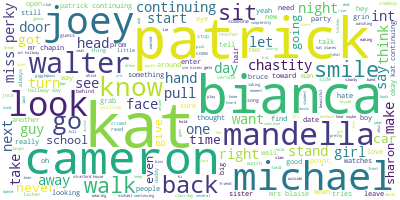

In [10]:
word_plot (script[0])


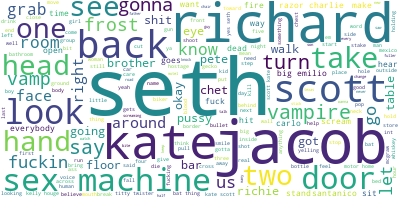

In [11]:
word_plot (script[300])


Chracter names of length 809 as the movie title shows that it is a list of lists.

It will converted to a flat list, and used to filter out character names in the scripts

In [12]:
def flatten_list (list_of_lists):
    flat_list = []
    for items in range (len(list_of_lists)):
        for names in range (len (list_of_lists[items])):
            flat_list.append (list_of_lists[items][names]) 
    return flat_list
            

In [13]:
character_list = flatten_list(characters)

In [14]:
len(character_list)

17776

The character_list will now be used to filter out the character names in all the scripts

In [15]:
def filter_text (original_text):
    filtered = []
    for words in original_text:
        filter_result = [word for word in words if not word in character_list]
        
        filtered.append (filter_result)
    return filtered

In [16]:
processed_script = filter_text (script)

To check the word cloud after the character names has been removed

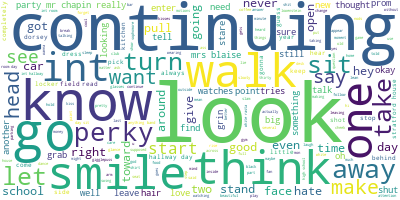

In [17]:
word_plot (processed_script[0])


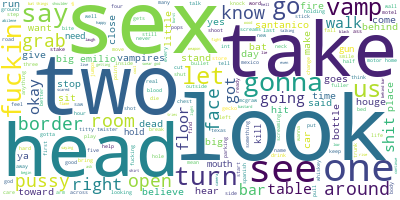

In [18]:
word_plot (processed_script[300])


This gives a much better insight that the former with character names

The movie titles and processed scripts will now be put in a dataframe

In [19]:
df_info = {'title': movie_title, 'movie_script':processed_script} 

df = pd.DataFrame(df_info)

In [20]:
df.head(3)

,title,movie_script
0,10 things i hate about you,"[ten, things, hate, mccullah, lutz, ten, thing..."
1,12 and holding,"[holding, cipriano, fade, neighborhood, street..."
2,12 monkeys,"[twelve, monkeys, twelve, monkeys, original, s..."


In [21]:
#To convert the movie_script from list to string
df['movie_script'] = [' '.join(map(str, lists)) for lists in df['movie_script']]

In [22]:
df.head(3)

,title,movie_script
0,10 things i hate about you,ten things hate mccullah lutz ten things hate ...
1,12 and holding,holding cipriano fade neighborhood street morn...
2,12 monkeys,twelve monkeys twelve monkeys original screenp...


# Next step is to find tags related to each movie. The genre and age rating

Beautiful soup will be used for this task, and the tag information will be scrapped from https://www.omdbapi.com/ 

In [23]:
#This creates the link to get the tags for each of the movies 
omdb_link = []
for titles in movie_title:
    omdb_link.append('https://www.omdbapi.com/?apikey=20913c72&t=' + titles)

The genre and age rating information can now be scrapped. 

An additional feature, will be created, the movie title. this will allow the dataframe that will be created from here be joined the the dataframe that contains the script

In [24]:
omdb_title = []
genre = []
rating = []


for links in omdb_link:
    try:
        r = requests.get(links)
        json_data = json.loads(r.text)
        json_response = json_data['Response']
        if (json_response == 'True'):
            omdb_title.append(json_data['Title'])
            genre.append(json_data['Genre'])
            rating.append(json_data['Rated'])
                            
            
            
    except Exception:
        continue
    

In [25]:
print (len (omdb_title))
print (len (genre))
print (len (rating))

785
785
785


The scripts whose tags were not gotten will be dropped

In [26]:
#Convert all titles to lower case, so they can be compared with titles in df
omdb_info = {'title': [w.lower() for w in omdb_title], 'movie_genre': genre, 'age_rating': rating} 
df_omdb = pd.DataFrame(omdb_info)

In [27]:
df_omdb.head(3)

,title,movie_genre,age_rating
0,10 things i hate about you,"Comedy, Drama, Romance",PG-13
1,12 and holding,Drama,R
2,12 monkeys,"Mystery, Sci-Fi, Thriller",R


In [28]:
df_merge = df.merge(df_omdb, on = 'title')

In [29]:
df_merge.head(3)

,title,movie_script,movie_genre,age_rating
0,10 things i hate about you,ten things hate mccullah lutz ten things hate ...,"Comedy, Drama, Romance",PG-13
1,12 and holding,holding cipriano fade neighborhood street morn...,Drama,R
2,12 monkeys,twelve monkeys twelve monkeys original screenp...,"Mystery, Sci-Fi, Thriller",R


In [31]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 705
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         706 non-null    object
 1   movie_script  706 non-null    object
 2   movie_genre   706 non-null    object
 3   age_rating    706 non-null    object
dtypes: object(4)
memory usage: 27.6+ KB


In [32]:
#Inspect the age_rating column for unique entries
df_merge['age_rating'].unique()

array(['PG-13', 'R', 'N/A', 'TV-MA', 'G', 'Passed', 'PG', 'Not Rated',
       'NC-17', 'TV-14', 'TV-PG', 'Approved', 'X', 'Unrated'],
      dtype=object)

In [34]:
df_merge [df_merge['age_rating'] == 'Unrated']

,title,movie_script,movie_genre,age_rating
483,orgy of the dead,orgy dead orgy dead wood jr novel orgy dead co...,"Fantasy, Horror",Unrated


In [35]:
df_merge [df_merge['age_rating'] == 'Not Rated']

,title,movie_script,movie_genre,age_rating
65,arsenic and old lace,arsenic old lace epstein adapted play kesselri...,"Comedy, Crime, Thriller",Not Rated
153,christ complex,complex richards fade close shot quinn leg ner...,"Comedy, Fantasy",Not Rated
186,croupier,screenplay mayersberg shooting fade int casino...,"Crime, Drama",Not Rated
196,day of the dead,day dead original romero fade empty street cit...,"Horror, Thriller",Not Rated
222,duck soup,breakfast club duck soup screenplay kalmar gro...,"Comedy, Musical",Not Rated
291,ginger snaps,snaps july fade fitzgerald home house dark alm...,"Drama, Fantasy, Horror",Not Rated
294,godfather,godfather godfather screenplay puzo ford coppo...,"Comedy, Drama, Romance",Not Rated
301,grand hotel,grand hotel bela balazs based play menschen im...,"Drama, Romance",Not Rated
342,in the loop,blackwell armando iannucci roche downing stree...,Comedy,Not Rated
390,les miserables,miserables nicholson alain boublil michel sch ...,"Drama, History",Not Rated


age_ratings listed as N/A are not available. these movies will be filtered out.

There is also one unrated movie, which will also not be used

Movies labelleld 'Not Rated will also not be considered'

Movies whose ratings are not classified by imdb from (https://help.imdb.com/article/contribution/titles/certificates/GU757M8ZJ9ZPXB39#) will also be filtered out

In [36]:
df_merge  = df_merge [  (df_merge['age_rating'] != 'N/A') & (df_merge['age_rating'] != 'Unrated') 
                     & (df_merge['age_rating'] != 'Not Rated') & (df_merge['age_rating'] != 'Approved') 
                     & (df_merge['age_rating'] != 'Passed')]

df_merge = df_merge.reset_index()


In [37]:
df_merge.head(1)

,index,title,movie_script,movie_genre,age_rating
0,0,10 things i hate about you,ten things hate mccullah lutz ten things hate ...,"Comedy, Drama, Romance",PG-13


In [38]:
del df_merge['index']

In [40]:
#Check the vlaues left in the age rating
df_merge['age_rating'].unique()

array(['PG-13', 'R', 'TV-MA', 'G', 'PG', 'NC-17', 'TV-14', 'TV-PG', 'X'],
      dtype=object)

For the remaining values of in 'age_rating', they will be grouped with those of similar rating type

In [41]:
def fix_age_rating (data):
    
    data['age_rating'] = np.where ( (data['age_rating'] == 'TV-PG'), 'PG', data['age_rating'] )
    
    data['age_rating'] = np.where ( (data['age_rating'] == 'TV-MA'), 'R', data['age_rating'] )
    data['age_rating'] = np.where ( (data['age_rating'] == 'NC-17'), 'R', data['age_rating'] )
    data['age_rating'] = np.where ( (data['age_rating'] == 'X'), 'R', data['age_rating'] )
    data['age_rating'] = np.where ( (data['age_rating'] == 'PG-13'), '13', data['age_rating'] )
    data['age_rating'] = np.where ( (data['age_rating'] == 'TV-14'), '14', data['age_rating'] )
    
    
    
    
fix_age_rating (df_merge)

In [42]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         655 non-null    object
 1   movie_script  655 non-null    object
 2   movie_genre   655 non-null    object
 3   age_rating    655 non-null    object
dtypes: object(4)
memory usage: 20.6+ KB


In [43]:
df_merge['age_rating'].value_counts()

R     409
13    164
PG     70
G       8
14      4
Name: age_rating, dtype: int64

In [44]:
df_merge

,title,movie_script,movie_genre,age_rating
0,10 things i hate about you,ten things hate mccullah lutz ten things hate ...,"Comedy, Drama, Romance",13
1,12 and holding,holding cipriano fade neighborhood street morn...,Drama,R
2,12 monkeys,twelve monkeys twelve monkeys original screenp...,"Mystery, Sci-Fi, Thriller",R
3,12,cut black title fin exterior la day fin chevy ...,"Crime, Drama, Thriller",13
4,127 hours,hours beaufoy scenes various massive could spo...,"Biography, Drama",R
...,...,...,...,...
650,year one,year one ramis stupnitsky eisenberg october be...,Comedy,13
651,yes man,yes stoller based yes first draft february new...,"Comedy, Romance",13
652,you can count on me,count screenplay lonergan shooting draft fade ...,Drama,R
653,youth in revolt,revolt gustin nash july black comes deep heavi...,"Comedy, Drama, Romance",R


# The data set will now be saved and loaded in another notebook attached to this submission for further processing and training

This will ensure the data scrapping is done only once, and can be re-used as many times as possible by importing from another notebook.

It will also avoid connection errors that might arise when scrapping the data

In [45]:
df_merge.to_csv ('movie_data.csv', index= False)